# A 30-seconds extract of real slow-wave sleep from one young individual. The sampling frequency is 100 Hz and the channel is F3.

In [63]:
import numpy as np
data = np.loadtxt('data.txt')

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

# Define sampling frequency and time vector
sf = 100.
time = np.arange(data.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('N3 sleep EEG data (F3)')
sns.despine()

In order to compute the average bandpower in the delta band, we first need to compute an estimate of the **power spectral density**. The most widely-used method to do that is the Welch's periodogram, which consists in averaging consecutive Fourier transform of small windows of the signal, with or without overlapping.

The Welch's method improves the accuracy of the classic periodogram. The reason is simple: EEG data are always time-varying, meaning that if you look at a 30 seconds of EEG data, it is very unlikely that the signal will looks like a perfect sum of pure sines. Rather, the spectral content of the EEG changes over time, constantly modified by the neuronal activity at play under the scalp. Problem is, to return a true spectral estimate, a classic periodogram requires the spectral content of the signal to be stationnary (i.e. time-unvarying) over the time period considered. Because it is never the case, the periodogram is generally biased and contains way too much variance. By averaging the periodograms obtained over short segments of the windows, the Welch's method allows to drastically reduce this variance. This comes at the cost, however, of a lower frequency resolution. Indeed, the frequency resolution is defined by:

 $$F res = Fs/N = Fs/FsT = 1/T$$

where 
F*s*
 is the sampling frequency of the signal, 
N
 the total number of samples and 
t
 the duration, in seconds, of the signal. In other words, if we were to use the full length of our data (30 seconds), our final frequency resolution would be 
1
/
30
=
0.033
 Hz, which is 30 frequency bins per Hertz. By using a 4-second sliding window, we reduce this frequency resolution to 4 frequency bins per Hertz, i.e. each step represents 0.25 Hz.
 
 How do we define the optimal window duration then? A commonly used approach is to take a window sufficiently long to encompasses at least two full cycles of the lowest frequency of interest. In our case, our lowest frequency of interest is 0.5 Hz so we will choose a window of 
2
/
0.5
=
4
 seconds.
 
 *Another conclusion from the equation above is that the only thing that increases frequency resolution is time. Changes in sampling frequency do not increase the frequency resolution but only the frequency coverage.*

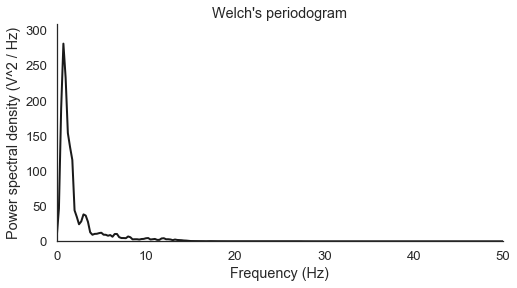

In [65]:
from scipy import signal

# Define window length (4 seconds)
win = 4 * sf
freqs, psd = signal.welch(data, sf, nperseg=win)

# Plot the power spectrum
sns.set(font_scale=1.2, style='white')
plt.figure(figsize=(8, 4))
plt.plot(freqs, psd, color='k', lw=2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, freqs.max()])
sns.despine()

The freqs vector contains the x-axis (frequency bins) and the psd vector contains the y-axis (power spectral density). The units of the power spectral density, when working with EEG data, is usually micro-Volts-squared per Hz (uV^2/Hz)

*The maximum value of the x-axis is always half the sampling frequency, which is exactly the Nyquist frequency*. 
This is where the notion of frequency coverage comes into play: if our signal was sampled at 200 Hz instead of 100 Hz, the maximum value on the x-axis would be 200 / 2 = 100 Hz instead of 50 Hz. In other words, increasing the sampling frequency results in a larger frequency range.


### Variance ###

In [66]:
from statistics import stdev
print("standard deveiation: % s" %(stdev(data)))
s =stdev(data)
v = s**2
# V is the variance.
print(v)
print("varaiance: % s" %(variance(data)))


standard deveiation: 19.72928132651634
389.2445416608263
varaiance: 389.24454166082637


#### Activity is same variance or mean power of signal.####

Coefficient of variation: The coefficient of variation (Cv) is a normalised measure of
the variance of a series of data. It is calculated by dividing the standard deviation by the
mean of the signal.

The activity parameter represents the signal power, the variance of a time function. This can indicate the surface of power spectrum in the frequency domain. 
$Activity=var(y(t))$

*Where y(t) represents the signal.*



In [67]:
pip install sympy as sym

Note: you may need to restart the kernel to use updated packages.


The *Mobility* parameter represents the mean frequency or the proportion of standard deviation of the power spectrum. This is defined as the square root of variance of the first derivative of the signal y(t) divided by variance of the signal y(t).

In [68]:
import sympy as sym
dy=data

In [69]:
print("varaiance of first derivative: % s" %(sym.diff(389.24454166082637)))

varaiance of first derivative: 0


**Mobility** is defined as the square root of variance of the first derivative of the signal y(t) divided by variance of the signal y(t).*

In [70]:
import math 
print("Mobility : %s" %math.sqrt(0/(389.24454166082637)))  
  

Mobility : 0.0


#### Complexity ##

**Sample entropy (SampEn)** is a modification of approximate entropy (ApEn), used for assessing the *complexity of physiological time-series signals*, diagnosing diseased states.

In [71]:
pip install sampen

Note: you may need to restart the kernel to use updated packages.


In [72]:
from sampen import sampen2

In [73]:
sampen_of_data = sampen2(data)

<font color=blue>SampEn has advantages of Data length independence and a relatively trouble-free implementation. </font>

In [74]:
print(" complexity : " ,sampen_of_data )

 complexity :  [(0, 5.128897771108428, 9.997621954039595e-05), (1, 3.6520293008866553, 0.0011788255535672065), (2, 3.4936173860442468, 0.006582016072082609)]
